<a href="https://colab.research.google.com/github/zainali60/Spark-Assignment-6/blob/main/The_Sparks_Foundation_Task_6_Exploratory_Data_Analysis_Prediction_using_Decision_tree_algorithm_(Level_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation: Task 6- Exploratory Data Analysis - Prediction using Decision tree algorithm (Level - Medium**

Author: Zain Ali


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier                     
from sklearn.metrics import accuracy_score                      
from sklearn.metrics import classification_report  
from sklearn import tree   

Loading Dataset

In [ ]:
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Checking missing values

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Changing Species Name to Numbers

In [ ]:
data = data.replace(to_replace ="Iris-setosa",value ="0") 
data = data.replace(to_replace ="Iris-versicolor",value ="1") 
data = data.replace(to_replace ="Iris-virginica",value ="2") 

Splitting Input and Targets

In [ ]:
X = np.array(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])                   # Input
Y = np.array(data["Species"]) 

Splitting Dataset into Train/Test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

Training Decision Tree

Using Gini Index

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth = 5,                     # Max Height of Tree
                                  min_samples_leaf = 3,              # Maximum Leaf samples
                                  random_state = 100)

In [ ]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Evaluating The mode

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['2', '0', '2', '0', '2', '2', '0', '0', '2', '0', '0', '2', '0',
       '0', '2', '1', '1', '2', '2', '2', '2', '0', '2', '0', '1', '2',
       '1', '0', '1', '2'], dtype=object)

In [ ]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)) 

Accuracy :  0.9666666666666667


In [ ]:
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

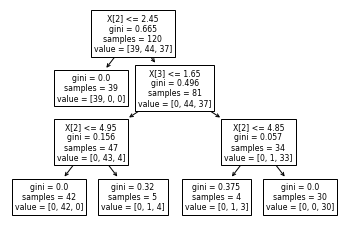

In [ ]:
tree.plot_tree(clf_gini)


Using Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",          # Criterion
                                     max_depth = 5,                  # Max Height of Tree
                                     min_samples_leaf = 3,           # Max Leaf samples
                                     random_state = 100)

training the model

In [ ]:
clf_entropy.fit(X_train, Y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Evaluating The model

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)  
y_pred_entropy

array(['2', '0', '2', '0', '2', '2', '0', '0', '2', '0', '0', '2', '0',
       '0', '2', '1', '1', '2', '2', '2', '2', '0', '2', '0', '1', '2',
       '1', '0', '1', '2'], dtype=object)

Accuracy 

In [ ]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_entropy))

Accuracy :  0.9666666666666667


In [ ]:
print ("Report : ",  classification_report(Y_test, y_pred_entropy))

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



Visualizing Decision tree

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

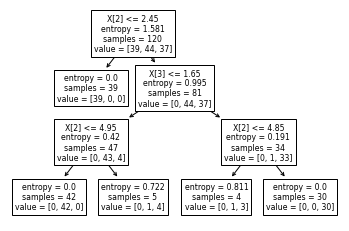

In [ ]:
tree.plot_tree(clf_entropy)